In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
test = pd.read_csv('/home/hasan/DATA SET/Housing Price AdvanceRegression/test.csv')

In [10]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
print('Shape of the test data :',test.shape)

Shape of the test data : (1459, 80)


# Feature Engineering

In [12]:
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [14]:
#checking null value
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

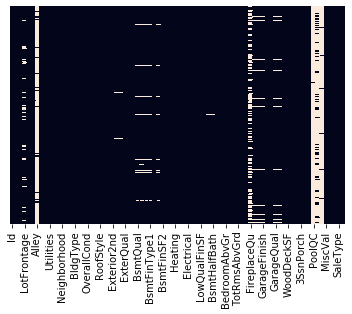

In [16]:
#vsualizing null value in graph
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)

In [18]:
#handling null in MSZoning column
n_null = test['MSZoning'].isnull().sum()
print('Total null in MSZoning column :', n_null)

test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

Total null in MSZoning column : 4


In [20]:
#handling null in LotFrontage column
n_null = test['LotFrontage'].isnull().sum()
print('Total null in LotFrontage column :', n_null)

test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

Total null in LotFrontage column : 227


In [21]:
#handling null in Alley column
test.drop('Alley', axis=1, inplace=True)

In [22]:
#handling null in Utilities column
n_null = test['Utilities'].isnull().sum()
print('Total null in Utilities column :', n_null)
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])

Total null in Utilities column : 2


In [24]:
#handling null in Exterior1st column
n_null = test['Exterior1st'].isnull().sum()
print('Total null in Exterior1st column :', n_null)
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])

Total null in Exterior1st column : 1


In [25]:
#handling null in Exterior2nd column
n_null = test['Exterior2nd'].isnull().sum()
print('Total null in Exterior2nd column :', n_null)
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])

Total null in Exterior2nd column : 1


In [26]:
#handling null in MasVnrType column
n_null = test['MasVnrType'].isnull().sum()
print('Total null in MasVnrType column :', n_null)
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])

Total null in MasVnrType column : 16


In [27]:
#handling null in MasVnrArea column
n_null = test['MasVnrArea'].isnull().sum()
print('Total null in MasVnrArea column :', n_null)
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])

Total null in MasVnrArea column : 15


In [28]:
#handling null in BsmtQual column
n_null = test['BsmtQual'].isnull().sum()
print('Total null in BsmtQual column :', n_null)
test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])

Total null in BsmtQual column : 44


In [29]:
#handling null in BsmtCond column
n_null = test['BsmtCond'].isnull().sum()
print('Total null in BsmtCond column :', n_null)
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])

Total null in BsmtCond column : 45


In [30]:
#handling null in BsmtExposure column
n_null = test['BsmtExposure'].isnull().sum()
print('Total null in BsmtExposure column :', n_null)
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])

Total null in BsmtExposure column : 44


In [31]:
#handling null in BsmtFinType1 column
n_null = test['BsmtFinType1'].isnull().sum()
print('Total null in BsmtFinType1 column :', n_null)
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])

Total null in BsmtFinType1 column : 42


In [32]:
#handling null in BsmtFinSF1 column
n_null = test['BsmtFinSF1'].isnull().sum()
print('Total null in BsmtFinSF1 column :', n_null)
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())

Total null in BsmtFinSF1 column : 1


In [33]:
#handling null in BsmtFinType2 column
n_null = test['BsmtFinType2'].isnull().sum()
print('Total null in BsmtFinType2 column :', n_null)
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])

Total null in BsmtFinType2 column : 42


In [34]:
#handling null in BsmtFinSF2 column
n_null = test['BsmtFinSF2'].isnull().sum()
print('Total null in BsmtFinSF2 column :', n_null)
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())

Total null in BsmtFinSF2 column : 1


In [35]:
#handling null in BsmtUnfSF column
n_null = test['BsmtUnfSF'].isnull().sum()
print('Total null in BsmtUnfSF column :', n_null)
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())

Total null in BsmtUnfSF column : 1


In [36]:
#handling null in TotalBsmtSF column
n_null = test['TotalBsmtSF'].isnull().sum()
print('Total null in TotalBsmtSF column :', n_null)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

Total null in TotalBsmtSF column : 1


In [37]:
'''#handling null in Electrical column
n_null = test['Electrical'].isnull().sum()
print('Total null in Electrical column :', n_null)
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])'''

Total null in Electrical column : 0


In [38]:
#handling null in BsmtFullBath column
n_null = test['BsmtFullBath'].isnull().sum()
print('Total null in BsmtFullBath column :', n_null)
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())

Total null in BsmtFullBath column : 2


In [39]:
#handling null in BsmtHalfBath column
n_null = test['BsmtHalfBath'].isnull().sum()
print('Total null in BsmtHalfBath column :', n_null)
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean())

Total null in BsmtHalfBath column : 2


In [40]:
#handling null in KitchenQual column
n_null = test['KitchenQual'].isnull().sum()
print('Total null in KitchenQual column :', n_null)
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

Total null in KitchenQual column : 1


In [41]:
#handling null in Functional column
n_null = test['Functional'].isnull().sum()
print('Total null in Functional column :', n_null)
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])

Total null in Functional column : 2


In [42]:
#handling null in FireplaceQu column
n_null = test['FireplaceQu'].isnull().sum()
print('Total null in FireplaceQu column :', n_null)
test['FireplaceQu'] = test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])

Total null in FireplaceQu column : 730


In [43]:
#handling null in GarageType column
n_null = test['GarageType'].isnull().sum()
print('Total null in GarageType column :', n_null)
test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode()[0])

Total null in GarageType column : 76


In [44]:
#handling null in GarageYrBlt column
n_null = test['GarageYrBlt'].isnull().sum()
print('Total null in GarageYrBlt column :', n_null)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())

Total null in GarageYrBlt column : 78


In [45]:
#handling null in GarageFinish column
n_null = test['GarageFinish'].isnull().sum()
print('Total null in GarageFinish column :', n_null)
test['GarageFinish'] = test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])

Total null in GarageFinish column : 78


In [46]:
#handling null in GarageCars column
n_null = test['GarageCars'].isnull().sum()
print('Total null in GarageCars column :', n_null)
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())

Total null in GarageCars column : 1


In [47]:
#handling null in GarageArea column
n_null = test['GarageArea'].isnull().sum()
print('Total null in GarageArea column :', n_null)
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())

Total null in GarageArea column : 1


In [48]:
#handling null in GarageQual column
n_null = test['GarageQual'].isnull().sum()
print('Total null in GarageQual column :', n_null)
test['GarageQual'] = test['GarageQual'].fillna(test['GarageQual'].mode()[0])

Total null in GarageQual column : 78


In [49]:
#handling null in GarageCond column
n_null = test['GarageCond'].isnull().sum()
print('Total null in GarageCond column :', n_null)
test['GarageCond'] = test['GarageCond'].fillna(test['GarageCond'].mode()[0])

Total null in GarageCond column : 78


In [51]:
test.drop(['PoolQC','Fence','MiscFeature','Id'], axis=1, inplace=True)

In [52]:
#handling null in SaleType column
n_null = test['SaleType'].isnull().sum()
print('Total null in SaleType column :', n_null)
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

Total null in SaleType column : 1


In [53]:
#checking null value
test.isnull().values.any()

False

In [54]:
#After null value cleaning
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [56]:
test.shape

(1459, 75)

In [59]:
test.to_csv('/home/hasan/Downloads/advance regression test.csv', index=False)